### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 30th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

In [1]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 4.4 MB/s eta 0:00:0000:0100:01


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import astroML

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

In [2]:
data = np.load('/Users/sofimar/vu_classes/astr_8070_s24/coursework/homeworks/hw_data/hw7_data_1.npy')
print(np.shape(data))

(500, 4)


In [3]:
Xx = data[:,0]
Xy = data[:,1]
y = data[:,2] # labels
yerr = data[:,3] # heteroscedastic uncertainties of labels

Text(0, 0.5, 'Label')

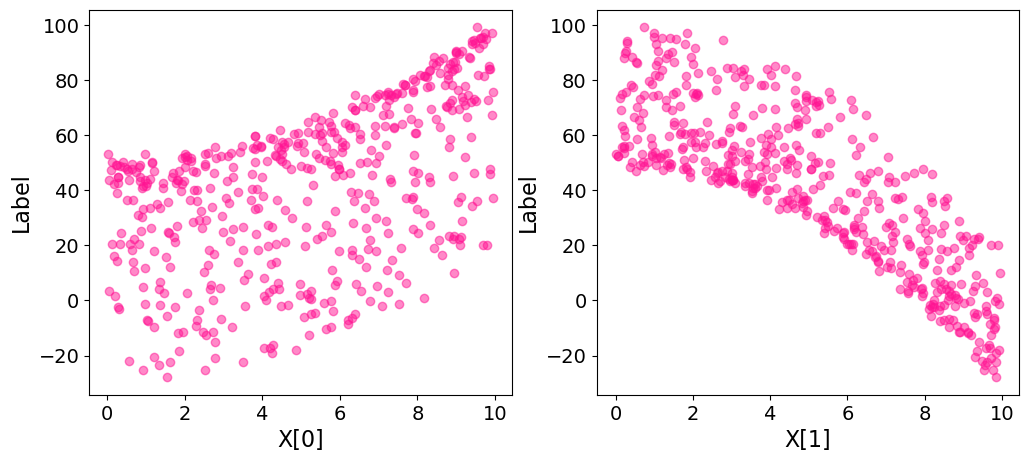

In [4]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(1,2,1)
plt.scatter(Xx, y, color='deeppink', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('X[0]', fontsize=16)
plt.ylabel('Label', fontsize=16)

fig.add_subplot(1,2,2)
plt.scatter(Xy, y, color='deeppink', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('X[1]', fontsize=16)
plt.ylabel('Label', fontsize=16)


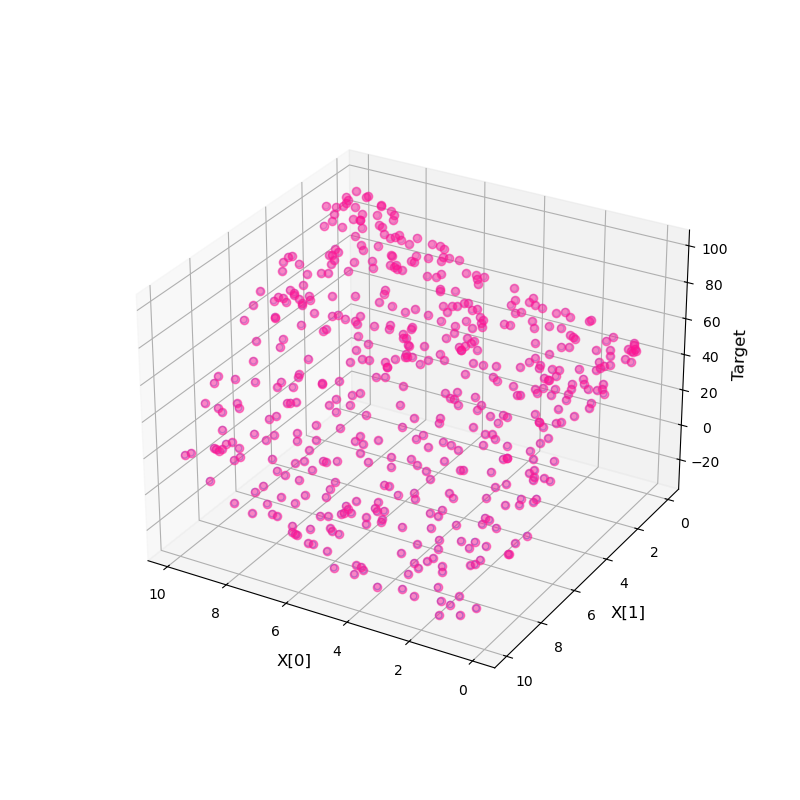

In [5]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xx, Xy, y, color='deeppink', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xx.flatten(), Xy.flatten(), y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [6]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

In [4]:
from astroML.linear_model import LinearRegression

/Users/sofimar/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [5]:
model = LinearRegression()
X = data[:,0:2]
linear_fit = model.fit(X,y,yerr)

In [6]:
linear_fit.coef_

array([57.10102323,  4.94873016, -8.30023407])

In [7]:
xgrid0 = np.linspace(np.min(Xx),np.max(Xx),50)
xgrid1 = np.linspace(np.min(Xy),np.max(Xy),50)

# yfit0 = 57.10102323 + xgrid0 - 8.30023407
# yfit1 = 57.10102323 + xgrid1 - 8.30023407
Xmesh = np.vstack(list(map(np.ravel, np.meshgrid(xgrid0, xgrid1)))).T
lin_pred = linear_fit.predict(Xmesh)

Text(0, 0.5, 'Label')

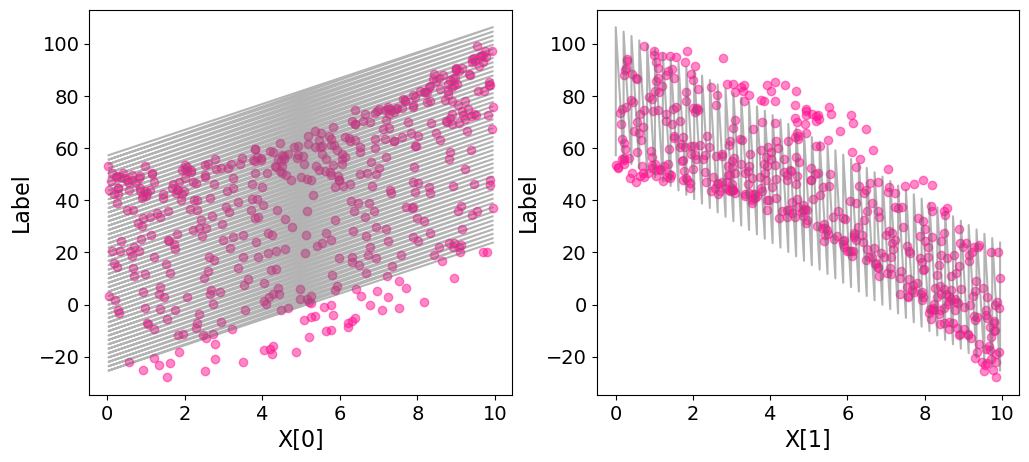

In [29]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(1,2,1)
plt.scatter(Xx, y, color='deeppink', alpha=0.5)
plt.plot(Xmesh[:,0], lin_pred, color='dimgrey', alpha=0.5)
# plt.plot(xgrid0, yfit0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('X[0]', fontsize=16)
plt.ylabel('Label', fontsize=16)

fig.add_subplot(1,2,2)
plt.scatter(Xy, y, color='deeppink', alpha=0.5)
plt.plot(Xmesh[:,1], lin_pred, color='dimgrey', alpha=0.5)
# plt.plot(xgrid1,yfit1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('X[1]', fontsize=16)
plt.ylabel('Label', fontsize=16)

**I'd say that's pretty good overall, though the right panel would probably fit better with a higher order polynomial regression**

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [56]:
Xx_arr = np.linspace(-2,12,14)
Xy_arr = np.linspace(-2,12,14)

In [57]:
mesh = np.vstack(list(map(np.ravel, np.meshgrid(Xx_arr, Xy_arr)))).T
mesh_fit = linear_fit.predict(mesh)

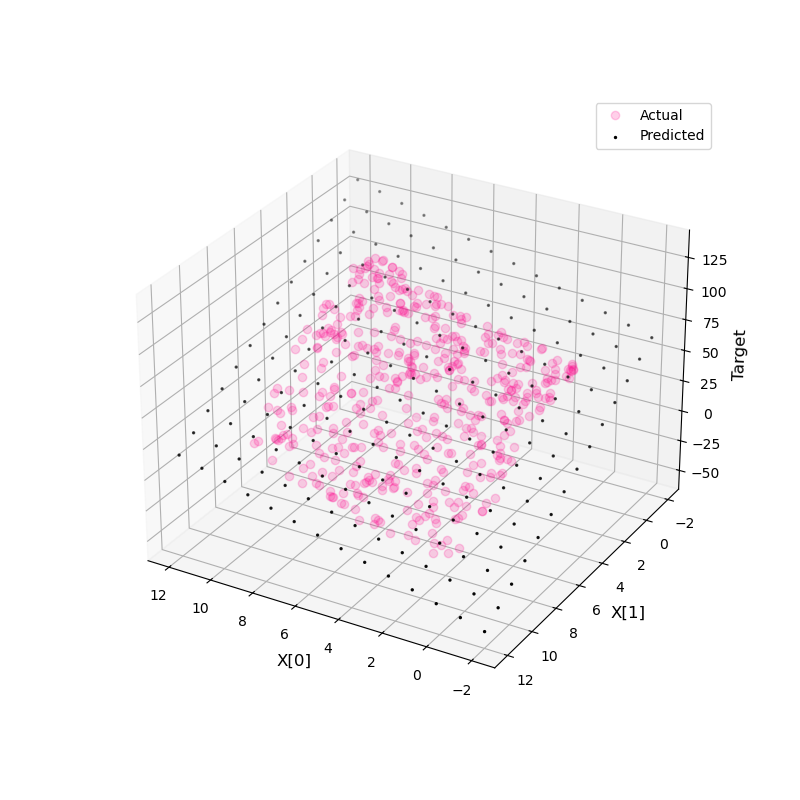

In [58]:
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# ax.plot(mesh[:,0], mesh[:,1], mesh_fit, color='deeppink', 
#         zorder=15, linestyle='none', 
#         marker='o', alpha=0.5)
ax.plot(Xx, Xy, y, color='deeppink', 
         linestyle='none', 
        marker='o', alpha=0.2, zorder=1, label='Actual')

ax.scatter(mesh[:,0].flatten(), mesh[:,1].flatten(), mesh_fit, 
           facecolor='black', s=2, 
           edgecolor='black', zorder=2, label='Predicted')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)

In [59]:
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV

In [140]:
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0],
'solver': ['svd', 'lsqr']}

In [141]:
gs = GridSearchCV(Ridge(), param_grid=ridge_params)

In [143]:
gs_fit = gs.fit(X,y, sample_weight=(1/yerr)**2)

In [144]:
gs_params = gs_fit.best_params_

In [145]:
gs_params

{'alpha': 1.0, 'solver': 'svd'}

In [146]:
print('Best Score: ',gs_fit.best_score_)

Best Score:  0.929182742615996


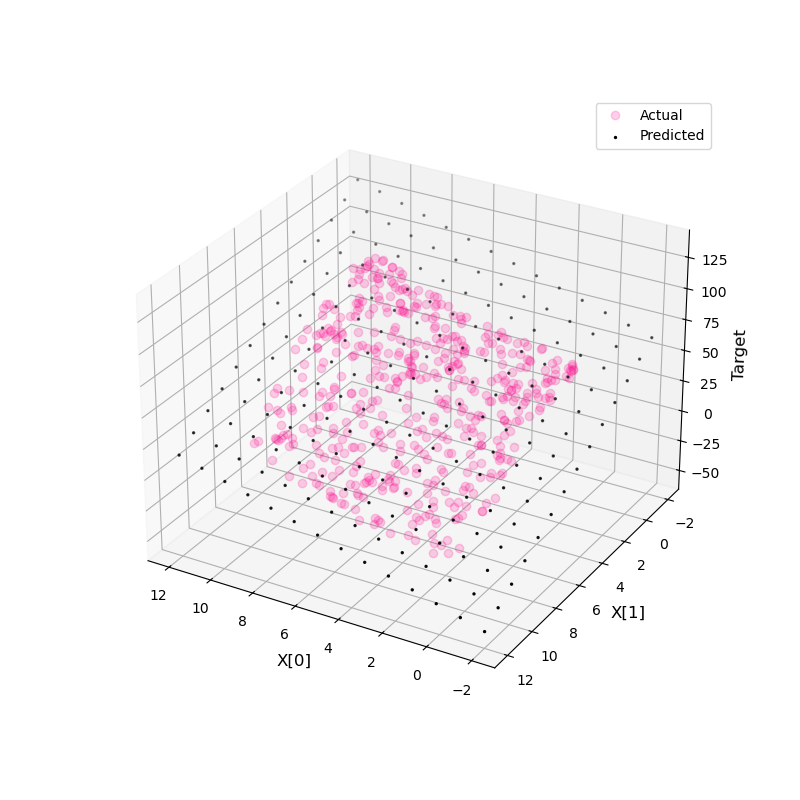

In [147]:
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

mesh_fit = gs_fit.predict(mesh)

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xx, Xy, y, color='deeppink', 
        zorder=1, linestyle='none', 
        marker='o', alpha=0.2, label='Actual')
ax.scatter(mesh[:,0].flatten(), mesh[:,1].flatten(), mesh_fit, 
           facecolor='black', s=2, 
           edgecolor='black', zorder=2, label='Predicted')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()

ax.view_init(elev=28, azim=120)

In [148]:
%matplotlib inline

In [149]:
rcv = RidgeCV(ridge_params['alpha'])

In [152]:
rcv_fit = rcv.fit(X,y, sample_weight=(1/yerr)**2)
print('alpha: ',rcv_fit.alpha_)
# print('Best Score: ',rcv_fit.best_score_)

alpha:  1.0


**Both methods agree that the best alpha is 1.0**

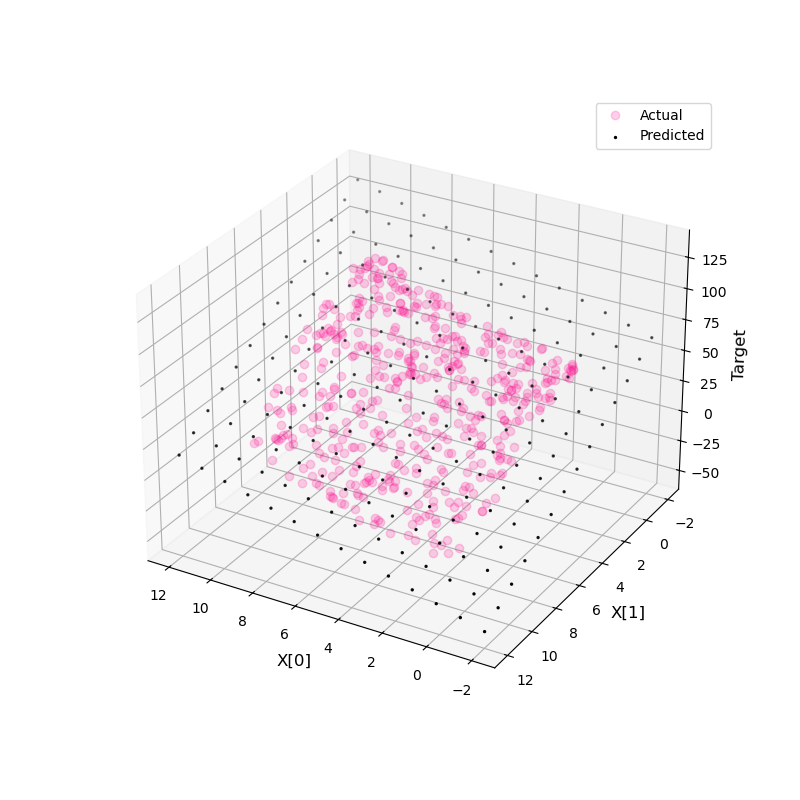

In [153]:
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

mesh_fit = rcv_fit.predict(mesh)

ax = fig.add_subplot(111, projection='3d')

ax.plot(Xx, Xy, y, color='deeppink', 
        zorder=1, linestyle='none', 
        marker='o', alpha=0.2, label='Actual')
ax.scatter(mesh[:,0].flatten(), mesh[:,1].flatten(), mesh_fit, 
           facecolor='black', s=2, 
           edgecolor='black', zorder=2, label='Predicted')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()

ax.view_init(elev=28, azim=120)

In [154]:
%matplotlib inline

5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

In [155]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [156]:
a = (yerr/y)**2
gpr = GaussianProcessRegressor()
gpr_a = GaussianProcessRegressor(alpha=a)

In [158]:
gpr_fit = gpr.fit(X,y)
gpr_fit_a = gpr_a.fit(X,y)

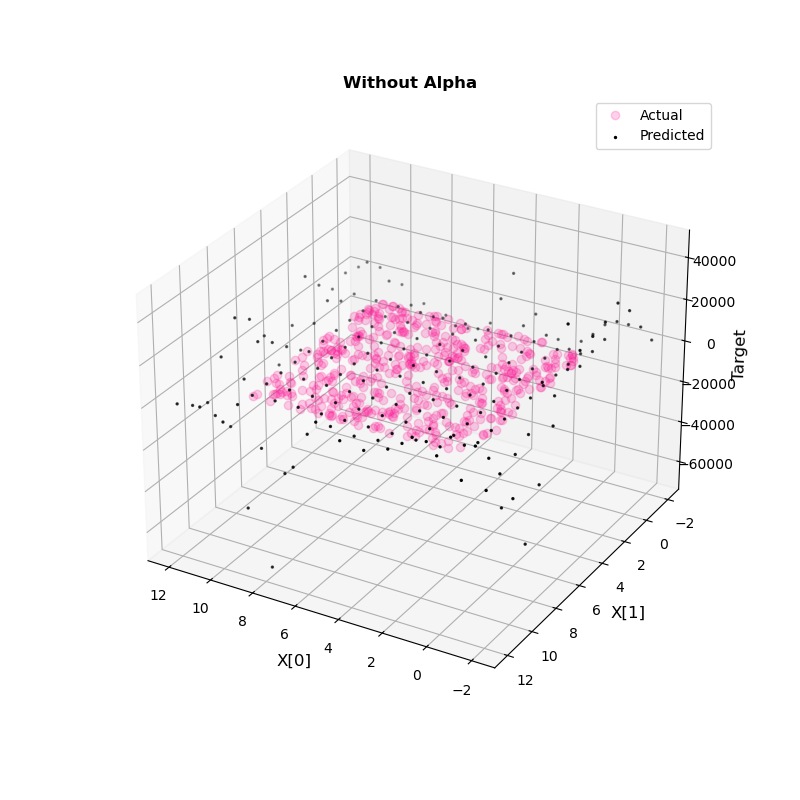

In [114]:
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

mesh_fit = gpr_fit.predict(mesh)

ax = fig.add_subplot(111, projection='3d')
ax.set_title('Without Alpha', weight='bold')
ax.plot(Xx, Xy, y, color='deeppink', 
        zorder=1, linestyle='none', 
        marker='o', alpha=0.2, label='Actual')
ax.scatter(mesh[:,0].flatten(), mesh[:,1].flatten(), mesh_fit, 
           facecolor='black', s=2, 
           edgecolor='black', zorder=2, label='Predicted')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()

ax.view_init(elev=28, azim=120)

In [115]:
%matplotlib inline

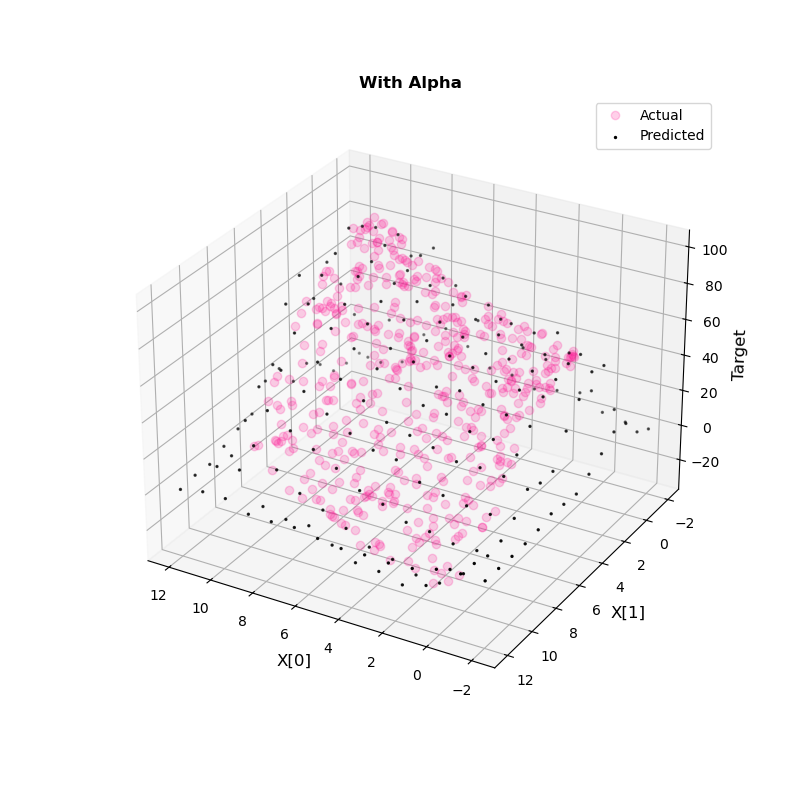

In [116]:
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

mesh_fit = gpr_fit_a.predict(mesh)

ax = fig.add_subplot(111, projection='3d')
ax.set_title('With Alpha', weight='bold')
ax.plot(Xx, Xy, y, color='deeppink', 
        zorder=1, linestyle='none', 
        marker='o', alpha=0.2, label='Actual')
ax.scatter(mesh[:,0].flatten(), mesh[:,1].flatten(), mesh_fit, 
           facecolor='black', s=2, 
           edgecolor='black', zorder=2, label='Predicted')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()

ax.view_init(elev=28, azim=120)

In [118]:
%matplotlib inline

6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

In [117]:
from astroML.linear_model import PolynomialRegression
poly4 = PolynomialRegression(degree=4)

In [79]:
poly_fit = poly4.fit(X,y, yerr)
print('Best-fit Regression Coefficients: ', poly_fit.coef_)

Best-fit Regression Coefficients:  [ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842380e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_78421/2647366021.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 8))


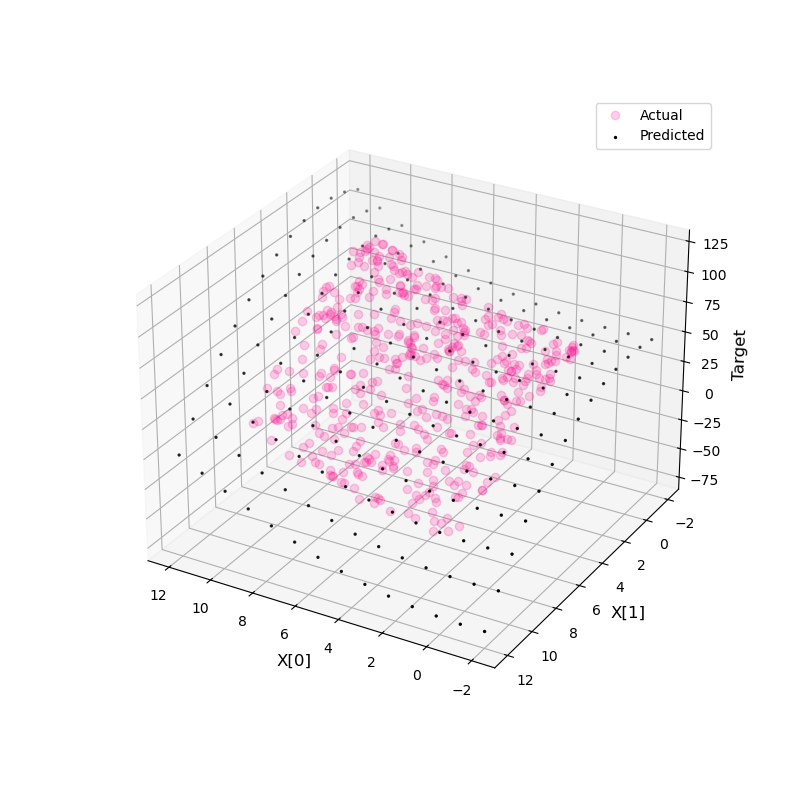

In [119]:
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

mesh_fit = poly_fit.predict(mesh)

ax = fig.add_subplot(111, projection='3d')
# ax.set_title('With Alpha', weight='bold')
ax.plot(Xx, Xy, y, color='deeppink', 
        zorder=1, linestyle='none', 
        marker='o', alpha=0.2, label='Actual')
ax.scatter(mesh[:,0].flatten(), mesh[:,1].flatten(), mesh_fit, 
           facecolor='black', s=2, 
           edgecolor='black', zorder=2, label='Predicted')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()

ax.view_init(elev=28, azim=120)

**This regression is the best out of the other models because it accounts for the curvature of the data, making the fit/predictions really similar to the actual data**

In [120]:
%matplotlib inline

7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y,yerr, test_size=0.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
depth = np.arange(1, 11)
rms_test = np.zeros(len(depth))
rms_train = np.zeros(len(depth))
rms_err = np.zeros(len(depth))
rms_err_t = np.zeros(len(depth))
# rms_err_test = np.zeros(len(depth))
# rms_err_train = np.zeros(len(depth))
i_best = 0
z_fit_best = None

In [51]:
N = len(X)

In [52]:
for i, d in enumerate(depth):
    clf = DecisionTreeRegressor(max_depth=d, random_state=0)
    clf.fit(X_train, y_train, yerr_train)

    fit_train = clf.predict(X_train)
    fit_ = clf.predict(X_test)

    # fit_t_std = fit_train.std()
    # fit_std = fit_.std(X_test)
    # fit_err_train = clf.predict(yerr_train)
    # fit_err = clf.predict(yerr_test)
    rms_train[i] = np.mean(np.sqrt((fit_train - y_train) ** 2))
    rms_test[i] = np.mean(np.sqrt((fit_ - y_test) ** 2))
    rms_err_t[i] = np.mean(np.sqrt((fit_train.std() - y_train) ** 2))
    rms_err[i] = np.mean(np.sqrt((fit_.std() - y_test) ** 2))
    # rms_err_train[i] = np.mean(np.sqrt((fit_t_std - yerr_train) ** 2))
    # rms_err_test[i] = np.mean(np.sqrt((fit_std - yerr_test) ** 2))]

    
    # bic = clf.bic(rms_test)
    # print(bic)

    if rms_test[i] <= rms_test[i_best]:
        i_best = i
        y_fit_best = fit_

best_depth = depth[i_best]

In [53]:
chi_sq = stats.chisquare(rms_err,rms_err_t)

bic = chi_sq + d*np.log10(N)
bic_.append(bic)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.007731808390327829

In [47]:
best_depth

8

Text(0, 0.5, 'rms')

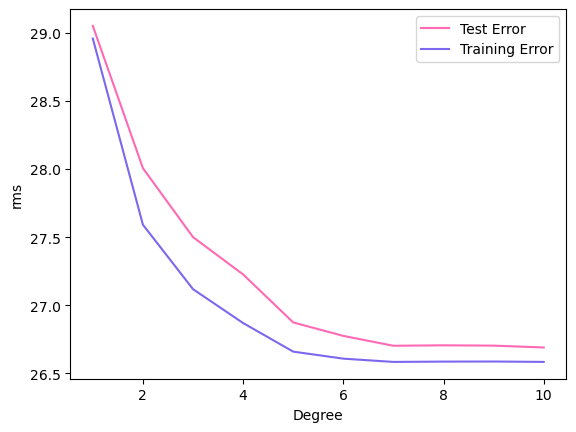

In [55]:
plt.plot(depth, rms_err, label='Test Error', color='hotpink')
plt.plot(depth, rms_err_t, label='Training Error', color='mediumslateblue')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('rms')